# Leet Code #1095

# 1095 Find in Mountain Array

[Link to
Problem](https://leetcode.com/problems/find-in-mountain-array/).

This is my first: - LeetCode Hard Problem in ~2 years - Problem being
written up as a solution like this - Using some C++ features, and trying
to optimize a solution

Lessons will be learned, and things will get easier

In [1]:
/**
 * // This is the MountainArray's API interface.
 * // You should not implement it, or speculate about its implementation
 * class MountainArray {
 *   public:
 *     int get(int index);
 *     int length();
 * };
 */

# Iteration One

Commenting code is not just about satisfying a requirement, but is more
about clarifying what you want to do *before* actually doing it. Clear
intentions are important when delivering accurate implementations.

In [ ]:
class Solution {
public:
    /**
     * Returns index of target in mountainAr, returning -1 if not found
     * 
     * @param[in] target        Value to search for in mountainArr
     * @param[in] mountainArr   MountainArray class defined above
     * @return  Minimum index i where mountainArr.get(i) == target, 
     *          or -1 if no index exists
     * 
     * @pre mountainArr is a `mountain array`:
     *          - len(mountainArr) >= 3
     *          - there exists some element that is a local max at index i:
     *              - arr[0] < arr[1] < ... < arr[i - 1] < arr[i]
     *              - arr[i] > arr[i + 1] > ... > arr[arr.length - 1]
     * 
     * @pre 3 <= mountainArr.length() <= 10**4
     * @pre 0 <= target <= 10**9
     * @pre 0 <= mountainArr.get(index) <= 10**9
     * 
     * @post int MountainArray::get(int index); will be called < 100 times
    */
    int findInMountainArray(int target, MountainArray &mountainArr) {

        // Grab middle element of arr +/- 1 index
        int len = mountainArr.length();
        int id1 = len / 2;
        int id0 = mid - 1;
        int id2 = mid + 1;

        int val0, val1, val2;

        val0 = mountainArr.get(id0);
        if (val0 == target) {
            return id0;
        }
        val1 = mountainArr.get(id1);
        if (val1 == target) {
            return id1;
        }
        val2 = mountainArr.get(id2);
        if (val2 == target) {
            return id2;
        }

        // Possible situations (+algorithm next steps):
        //   - At peak :)
        //      - Search left slope
        //      - Search right slope
        //   - Left slope > target
        //      - Search remaining left slope (down to end)
        //      - Find peak
        //      - Search right slope
        //   - Left slope < target
        //      - Find peak
        //      - Search remaining left slope (up to peak)
        //      - Search right slope
        //   - Right slope > target
        //      - Find peak
        //      - Search left slope
        //      - Search remaining right slope (down to end)
        //   - Right slope < target
        //      - Find peak
        //      - Search left slope
        //      - Search remaining right slope (up to peak)

        // When searching for the peak:
        //  - Track while traversing mountain interim values - clip mountain as needed...
        //  - While going to the right, if slope increases once, then decreases, careful of peak location:
        //      x --- y --- z --- a --- b
        //    Say you test x, then z. x < z, so you test a.
        //    If z < a, need to look between z <=> a and a <=> b for the peak
        //    If z > a, need to look at y
        //          If y > z, peak between x <=> y !!
        //          If y < z, peak between y <=> z and z <=> a
        //  - The opposite applies while ascending the mountain to the left
        
        // Determine slope, find peak of mountain
        // (binary) Search left side of mountain
        // (binary) Search right side of mountain
    }
};

## Lunch Break

After coming back from lunch, and trying to flesh out the pseudocode, I
was thinking that you could try and do quite a few different things, but
at the end of the day we can simplify all of the edge cases by just:

1.  Finding the peak
2.  Binary search the left side of the mountain
3.  Binary search the right side of the mountain (keeping in mind we are
    descending, not ascending order)

## Looking at a solution

https://leetcode.com/problems/find-in-mountain-array/solutions/4159000/100-binary-search-explained-intuition/

I admit that I did look at the linked solution, so with this in mind, I
will try and re-write the code for understanding’s sake, and also see if
I can do anything nifty with C++17 features.

What I also didn’t realise is: - Expressing questions about alogirthmic
complexity and testing hypothesis is important - You can modify the
class to help with breaking down your algorithm into simpler
sub-components

# Iteration 2

This is basically just copied from the solution, but since I just want a
baseline, seems like a great starting point.

In [ ]:
class Solution {
public:
    /**
     * Returns index of target in mountainAr, returning -1 if not found
     * 
     * @param[in] target        Value to search for in mountainArr
     * @param[in] mountainArr   MountainArray class defined above
     * @return  Minimum index i where mountainArr.get(i) == target, 
     *          or -1 if no index exists
     * 
     * @pre mountainArr is a `mountain array`:
     *          - len(mountainArr) >= 3
     *          - there exists some element that is a local max at index i:
     *              - arr[0] < arr[1] < ... < arr[i - 1] < arr[i]
     *              - arr[i] > arr[i + 1] > ... > arr[arr.length - 1]
     * 
     * @pre 3 <= mountainArr.length() <= 10**4
     * @pre 0 <= target <= 10**9
     * @pre 0 <= mountainArr.get(index) <= 10**9
     * 
     * @post int MountainArray::get(int index); will be called < 100 times
    */
    int findInMountainArray(int target, MountainArray &mountainArr) {

        int len = mountainArr.length();

        // Find the index of the peak element in the mountain array.
        int peakIndex = findPeakIndex(1, len - 2, mountainArr);

        // Binary search for the target in the increasing part of the mountain array.
        int increasingIndex = binarySearch(0, peakIndex, target, mountainArr, false);
        if (mountainArr.get(increasingIndex) == target) 
            return increasingIndex; // Target found in the increasing part.

        // Binary search for the target in the decreasing part of the mountain array.
        int decreasingIndex = binarySearch(peakIndex + 1, len - 1, target, mountainArr, true);
        if (mountainArr.get(decreasingIndex) == target) 
            return decreasingIndex; // Target found in the decreasing part.

        return -1;  // Target not found in the mountain array.
    }

    int findPeakIndex(int low, int high, MountainArray &mountainArr) {
        while (low != high) {
            int mid = low + (high - low) / 2;
            // If we still need to travel up slope, increment low
            if (mountainArr.get(mid) < mountainArr.get(mid + 1)) {
                low = mid + 1;
            }
            // Otherwise we found a downslope, so search to the left of mid
            else {
                high = mid;
            }
        }
        return low;
    }

    /**
     * @pre mountainArr[low:high] is sorted
    */
    int binarySearch(int low, int high, int target, MountainArray &mountainArr, bool reversed) {
         while (low != high) {
            int mid = low + (high - low) / 2;
            if (reversed) {
                if (mountainArr.get(mid) > target)
                    low = mid + 1; // Move to the right side for a decreasing slope.
                else
                    high = mid; // Move to the left side for an increasing slope.
            } else {
                if (mountainArr.get(mid) < target)
                    low = mid + 1; // Move to the right side for an increasing slope.
                else
                    high = mid; // Move to the left side for a decreasing slope.
            }
        }
        return low; // Return the index where the target should be or would be inserted.
    }
};

Testing the above through the notebooks might be doable, but not
immediately self-evident. Certainly for some easier problems this is
doable, and to test C++ features useful, but would require too much
effort for this problem to also have to implement MountainArray (maybe I
am just too lazy).

## Results

https://leetcode.com/problems/find-in-mountain-array/submissions/1075264021/

-   Runtime: 3ms
-   Memory: 7.5 MB

Best solutions have:

-   Runtime: 0ms (maybe incorrect data)
-   Memory: 6.8 MB

While these differences are somewhat negligable in terms of real life, I
am sure that these optimizations add up quickly in more complex
applications.

# Iteration 3

## Goals

-   Do what seems obvious
-   Beat either runtime or memory

<figure>
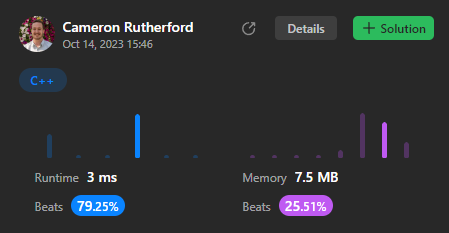
<figcaption aria-hidden="true">Iteration 2 breakdown</figcaption>
</figure>

Since runtime seems more important, lets try for that. (I forgot to
reference the solution that inspired me)

In [ ]:
class Solution {
public:
    int findInMountainArray(int target, MountainArray &mountainArr) {

        int len = mountainArr.length();
        
        int peakIndex = findPeakIndex(1, len - 2, mountainArr);

        int increasingIndex = binarySearch(0, peakIndex, target, mountainArr, false);
        if (mountainArr.get(increasingIndex) == target) return increasingIndex;

        int decreasingIndex = binarySearch(peakIndex + 1, len - 1, target, mountainArr, true);
        if (mountainArr.get(decreasingIndex) == target) return decreasingIndex;

        return -1; 
    }

    int findPeakIndex(int low, int high, MountainArray &mountainArr) {
        // NEW: Lets just try not re-initialize mid every while iteration
        int mid;
        while (low != high) {
            mid = low + (high - low) / 2;
            if (mountainArr.get(mid) < mountainArr.get(mid + 1)) {
                low = mid + 1;
            }
            else {
                high = mid;
            }
        }
        return low;
    }

    int binarySearch(int low, int high, int target, MountainArray &mountainArr, bool reversed) {
        // NEW: Lets just try not re-initialize mid every while iteration
        int mid;
        while (low != high) {
            mid = low + (high - low) / 2;
            if (reversed) {
                if (mountainArr.get(mid) > target)
                    low = mid + 1;
                else
                    high = mid;
            } else {
                if (mountainArr.get(mid) < target)
                    low = mid + 1;
                else
                    high = mid;
            }
        }
        return low;
    }
};

## Results

<figure>
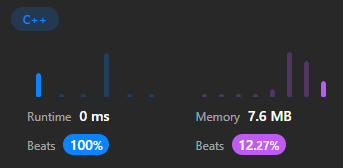
<figcaption aria-hidden="true">Iteration 3 breakdown</figcaption>
</figure>

-   Runtime: 0ms (possible to get 0ms)
-   Memory: 7.6 MB (+0.1MB from before)

Awesome. That small change was sufficient to fix all of our runtime
issues, but memory got worse?

# Iteration 4

## Goals

-   What makes a low memory footprint?
-   What C++ features can help here?

It seems like functional/recursive programming here gives a smaller
memory footprint, so some re-structuring will be happening.

Additionally just storing the peak element within the class is going to
help? I am just going to try the memory change, and then go for
functional.

In [ ]:
class Solution {
private:
    // NEW - keep this data internal to class
    int peak = -1;
public:
    int findInMountainArray(int target, MountainArray &mountainArr) {

        int len = mountainArr.length();
        
        // Just call function
        findPeakIndex(1, len - 2, mountainArr);

        int increasingIndex = binarySearch(0, peak, target, mountainArr, false);
        if (mountainArr.get(increasingIndex) == target) return increasingIndex;

        int decreasingIndex = binarySearch(peak + 1, len - 1, target, mountainArr, true);
        if (mountainArr.get(decreasingIndex) == target) return decreasingIndex;

        return -1; 
    }

    // NEW - void function modifying peak internal variable
    void findPeakIndex(int low, int high, MountainArray &mountainArr) {
        int mid;
        while (low != high) {
            mid = low + (high - low) / 2;
            if (mountainArr.get(mid) < mountainArr.get(mid + 1)) {
                low = mid + 1;
            }
            else {
                high = mid;
            }
        }
        // Set peak index here
        peak = low;
        return;
    }

    int binarySearch(int low, int high, int target, MountainArray &mountainArr, bool reversed) {
        int mid;
        while (low != high) {
            mid = low + (high - low) / 2;
            if (reversed) {
                if (mountainArr.get(mid) > target)
                    low = mid + 1;
                else
                    high = mid;
            } else {
                if (mountainArr.get(mid) < target)
                    low = mid + 1;
                else
                    high = mid;
            }
        }
        return low;
    }
};

## Results

<figure>
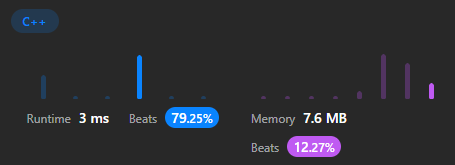
<figcaption aria-hidden="true">Iteration 4 breakdown</figcaption>
</figure>

-   Runtime: 3ms (+3ms, but in alignment with original)
-   Memory: 7.57 MB (+0.1MB from before)

My changes seem arbitrary, and at this point I have decided to just
solve more problems.